<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importations" data-toc-modified-id="Importations-1">Importations</a></span></li><li><span><a href="#Ajout-de-tout-le-barda" data-toc-modified-id="Ajout-de-tout-le-barda-2">Ajout de tout le barda</a></span></li><li><span><a href="#Vue-des-nans" data-toc-modified-id="Vue-des-nans-3">Vue des nans</a></span></li><li><span><a href="#Vue-globale" data-toc-modified-id="Vue-globale-4">Vue globale</a></span></li><li><span><a href="#Corrélation" data-toc-modified-id="Corrélation-5">Corrélation</a></span></li></ul></div>

In [2]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = 15, 10

# Importations

In [7]:
DATA_X = pd.read_csv(path + "Train/Train/X_station_train.csv")
DATA_Y = pd.read_csv(path + "Train/Train/Y_train.csv")
COORDS = pd.read_csv(path + "Other/Other/stations_coordinates.csv")

In [8]:
train = DATA_X.copy()
y = DATA_Y.copy()
coords = COORDS.copy()

In [14]:
d = pd.read_csv(path + "Test/Test/X_station_test.csv")

In [15]:
d

,dd,hu,td,t,ff,precip,month,Id
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8
...,...,...,...,...,...,...,...,...
2304797,190.0,82.8,277.00,279.74,10.62,0.0,12,95690001_176_19
2304798,195.0,84.2,277.44,279.93,11.86,0.0,12,95690001_176_20
2304799,199.0,85.7,277.95,280.21,11.77,0.0,12,95690001_176_21
2304800,198.0,85.3,278.25,280.58,10.16,0.0,12,95690001_176_22


In [9]:
train

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4
...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22


In [10]:
y

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0
...,...,...,...,...
183742,2017-12-31,86137003,5.0,86137003_729
183743,2017-12-31,86165005,3.2,86165005_729
183744,2017-12-31,86272002,1.8,86272002_729
183745,2017-12-31,91200002,1.6,91200002_729


In [16]:
d

,dd,hu,td,t,ff,precip,month,Id
0,NaN,NaN,NaN,278.35,NaN,NaN,12,14047002_277_4
1,NaN,NaN,NaN,278.40,NaN,0.0,12,14047002_277_5
2,NaN,NaN,NaN,279.01,NaN,0.0,12,14047002_277_6
3,NaN,NaN,NaN,279.66,NaN,0.0,12,14047002_277_7
4,NaN,NaN,NaN,279.99,NaN,0.0,12,14047002_277_8
...,...,...,...,...,...,...,...,...
2304797,190.0,82.8,277.00,279.74,10.62,0.0,12,95690001_176_19
2304798,195.0,84.2,277.44,279.93,11.86,0.0,12,95690001_176_20
2304799,199.0,85.7,277.95,280.21,11.77,0.0,12,95690001_176_21
2304800,198.0,85.3,278.25,280.58,10.16,0.0,12,95690001_176_22


# Ajout de tout le barda

In [12]:
train = train.merge(coords, how="left", on="number_sta")

In [13]:
train

,number_sta,date,ff,t,td,hu,dd,precip,Id,lat,lon,height_sta
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,49.334,-0.431,2.0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,49.334,-0.431,2.0
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,49.334,-0.431,2.0
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,49.334,-0.431,2.0
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,49.334,-0.431,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,49.108,1.831,126.0
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,49.108,1.831,126.0
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,49.108,1.831,126.0
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,49.108,1.831,126.0


In [17]:
train["month"] = train["date"].replace(to_replace="^.{5}", value="", regex=True)\
                              .replace(to_replace=".{12}$", value="", regex=True)

train["day"] = train["date"].replace(to_replace="^.{8}", value="", regex=True)\
                            .replace(to_replace=".{9}$", value="", regex=True)

train["hour"] = train["date"].replace(to_replace="^.{11}", value="", regex=True)\
                             .replace(to_replace=".{6}$", value="", regex=True)

In [18]:
train = train.astype({"month": "int8", "day": "int8", "hour": "int8"})
train = train.astype({"Id": str, 
                      "number_sta": "category", 
                      "month": "category", 
                      "day": "category", 
                      "hour": "category"})

# Vue des nans

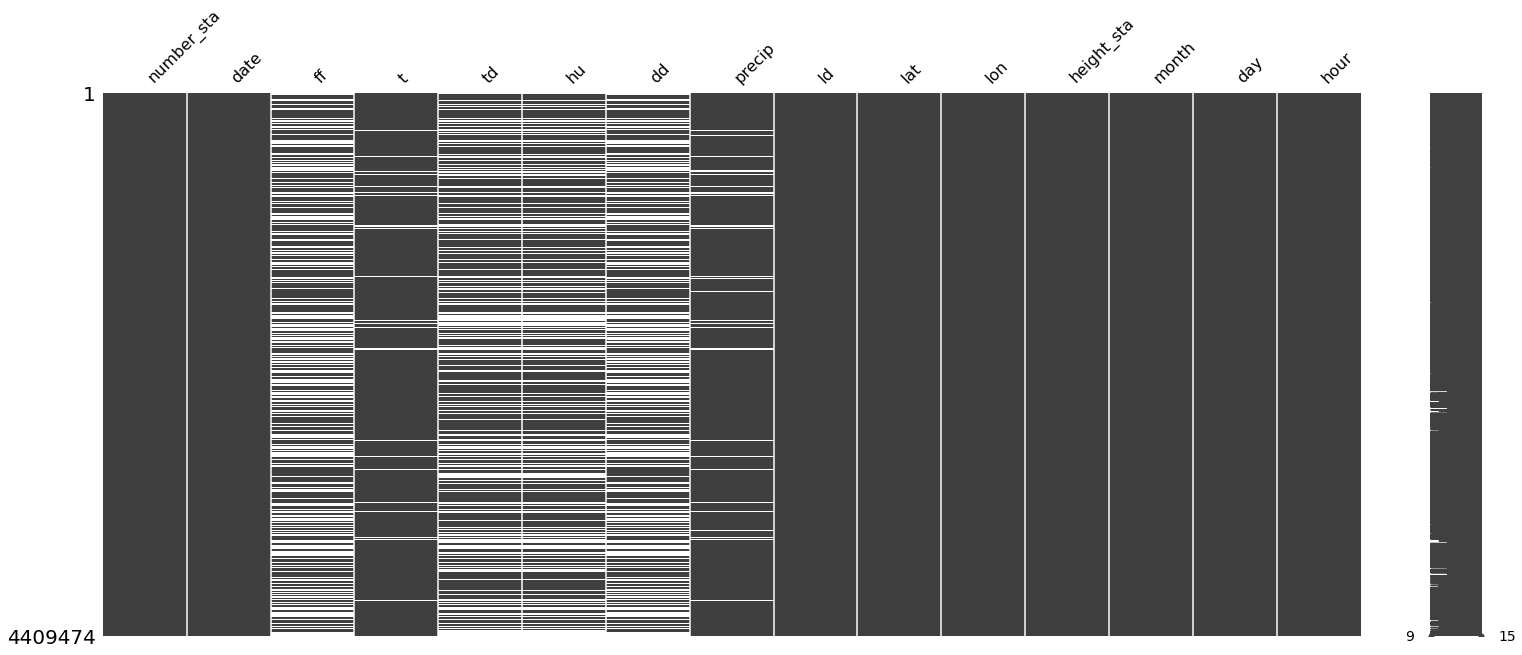

In [19]:
msno.matrix(train);

# Vue globale

Couleurs = $\texttt{month}$

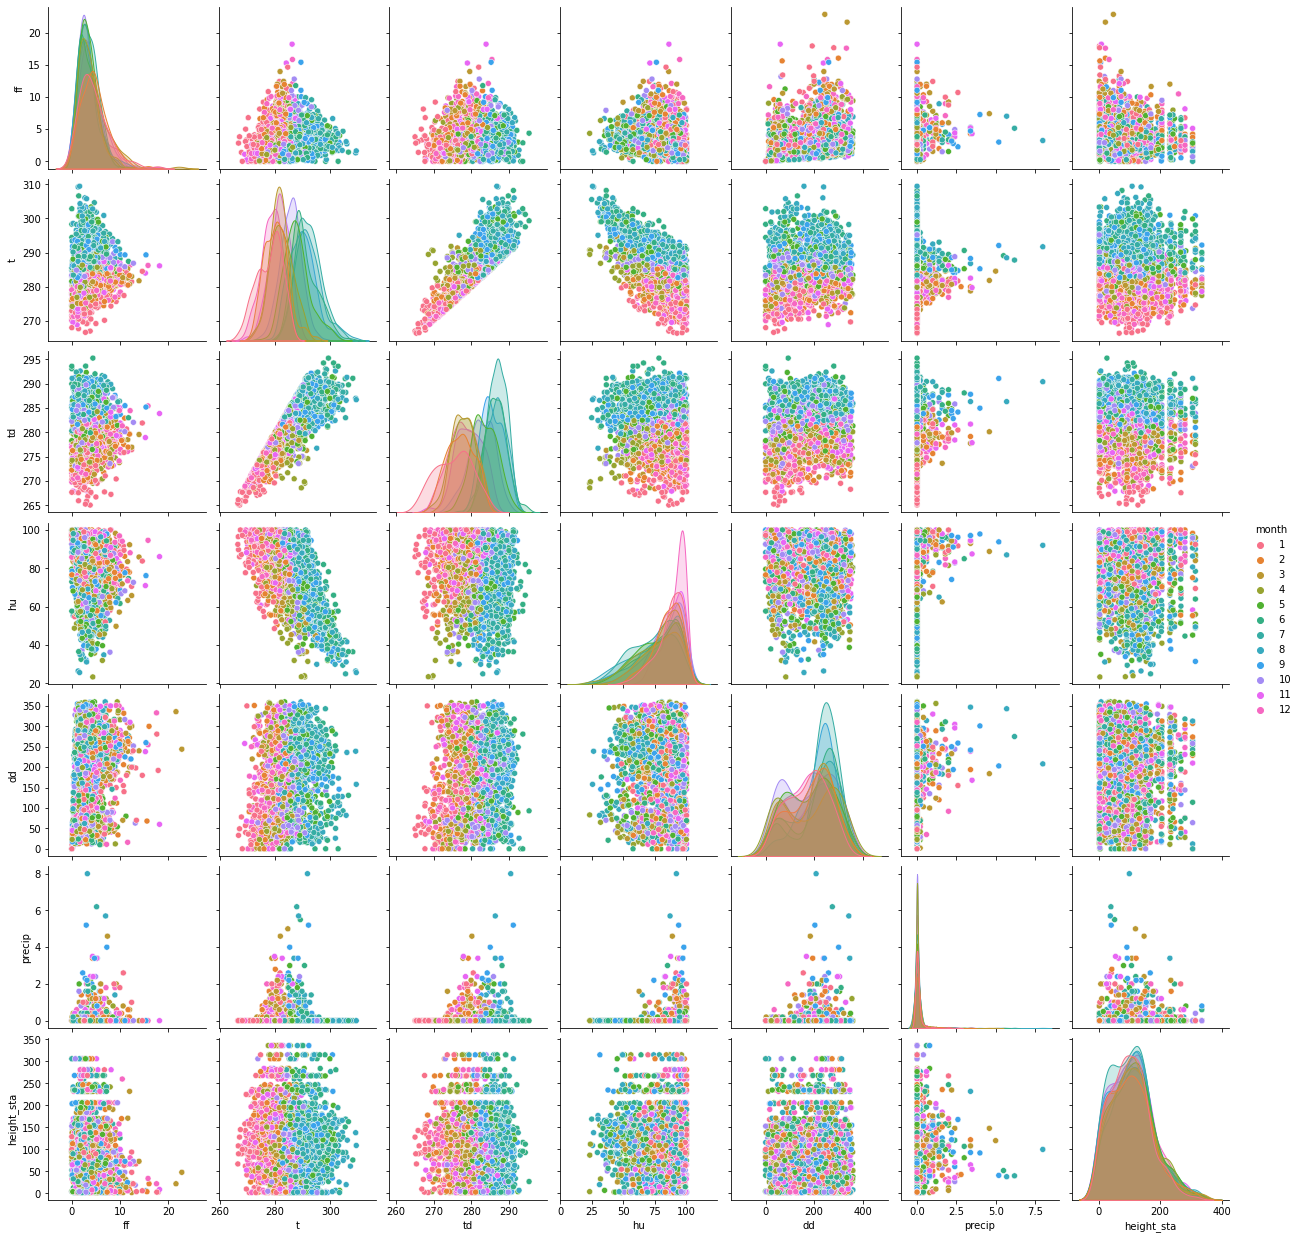

In [25]:
sns.pairplot(train.drop(["lat", "lon"], axis=1).sample(frac=.001), hue="month");

# Corrélation

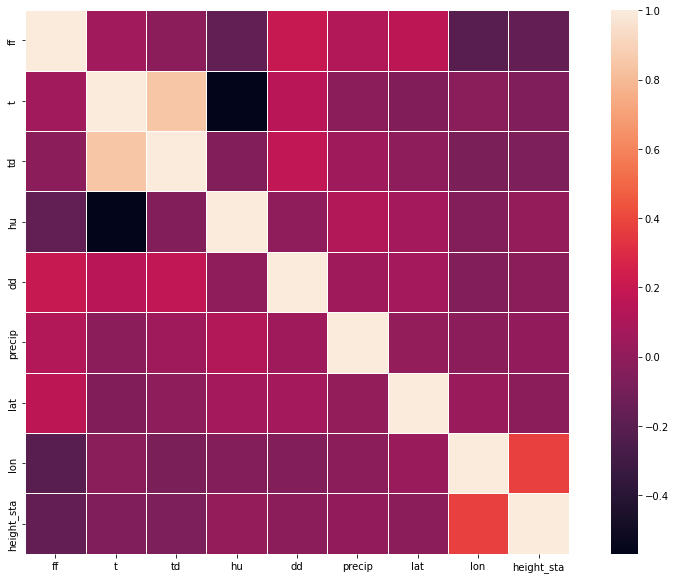

In [26]:
sns.heatmap(train.corr(), square=True, linewidths=1);

In [27]:
train_agg = train.copy()
train_agg["Id"].replace(to_replace=".\d+$", value="", regex=True, inplace=True)
train_agg = train_agg.groupby("Id", as_index=False).agg({
    "number_sta": "first",
    "ff": "median",
    "t": "median",
    "td": "median",
    "hu": "median",
    "dd": "median",
    "precip": "sum",
    "month": "first",
    "day": "first",
    "hour": "first",
    "lat": "first",
    "lon": "first",
    "height_sta": "first"
})

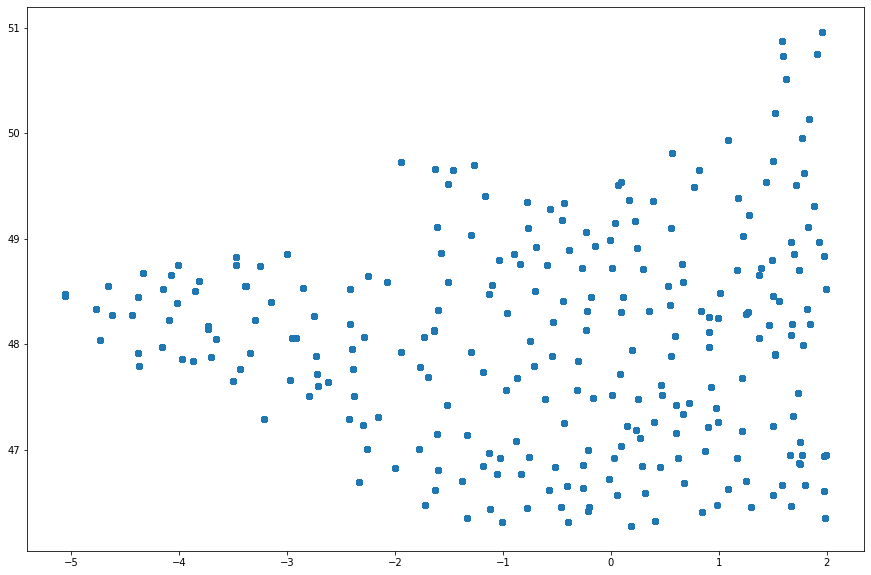

In [28]:
x = train_agg.lon
y = train_agg.lat
h = train_agg.height_sta
plt.plot(x, y, 'o')

In [35]:
from math import dist

In [61]:
d_sta = {}
d_coo = {}
for i, sta1 in enumerate(coords.number_sta):
    x1 = coords.lon[i]
    y1 = coords.lat[i]
    p1 = (x1, y1)
    mini = float("inf")
    for j, sta2 in enumerate(coords.number_sta):
        if i != j:
            x2 = coords.lon[j]
            y2 = coords.lat[j]
            p2 = (x2, y2)

            if dist(p1, p2) < mini:
                vois = sta2
                mini = dist(p1, p2)
        
        d_sta[sta1] = vois
        d_coo[p1] = p2
d_sta

{86118001: 86273001,
 86149001: 86137003,
 56081003: 29249002,
 53215001: 53110002,
 22135001: 22005003,
 56178003: 56151001,
 86092002: 86066001,
 86096001: 86272002,
 79253002: 79270003,
 41173002: 41173003,
 56251001: 56243001,
 85119001: 85097001,
 29278001: 29249002,
 35238800: 35238003,
 44051002: 35202001,
 36088005: 36088004,
 29236001: 29293001,
 37249001: 37213003,
 78465001: 78505001,
 36088004: 36088005,
 37122003: 37122001,
 36085001: 36147001,
 36146001: 36006004,
 36006004: 36219001,
 36037001: 36063001,
 50615001: 50209001,
 78140001: 78380001,
 86272002: 86066001,
 14577003: 14066001,
 14126001: 14229001,
 28134004: 28239002,
 28002001: 28215001,
 28280003: 28407001,
 14047002: 14515001,
 14066001: 14577003,
 14137001: 14577003,
 14216001: 14624001,
 14229001: 14126001,
 14239001: 14515001,
 14296001: 50144001,
 14357002: 14372001,
 14366002: 14126001,
 14372001: 14047002,
 14501002: 61179001,
 14515001: 14047002,
 14578001: 76552001,
 14624001: 14216001,
 14659001: 14

In [57]:
train_agg["voisin"] = train_agg["number_sta"]
train_agg["v_lat"] = train_agg["number_sta"]

In [58]:
train_agg = train_agg.replace({"voisin": d_sta})

In [59]:
train_agg

,Id,number_sta,ff,t,td,hu,dd,precip,month,day,hour,lat,lon,height_sta,voisin
0,14066001_0,14066001,3.695,281.325,278.625,90.15,142.0,0.2,1,1,0,49.334,-0.431,2.0,14577003
1,14066001_1,14066001,7.690,282.870,280.045,83.60,207.0,3.4,1,2,0,49.334,-0.431,2.0,14577003
2,14066001_10,14066001,5.340,279.520,277.385,86.90,226.5,6.0,1,11,0,49.334,-0.431,2.0,14577003
3,14066001_100,14066001,4.435,283.950,278.005,80.95,133.0,11.6,4,10,0,49.334,-0.431,2.0,14577003
4,14066001_101,14066001,1.790,282.720,281.360,89.55,171.5,5.6,4,11,0,49.334,-0.431,2.0,14577003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183742,95690001_725,95690001,7.310,279.005,276.850,85.00,202.0,2.4,12,26,0,49.108,1.831,126.0,78140001
183743,95690001_726,95690001,8.285,277.110,274.885,88.75,276.5,3.2,12,27,0,49.108,1.831,126.0,78140001
183744,95690001_727,95690001,2.875,274.495,273.055,88.70,250.5,0.0,12,28,0,49.108,1.831,126.0,78140001
183745,95690001_728,95690001,6.545,278.760,275.480,91.95,210.0,4.4,12,29,0,49.108,1.831,126.0,78140001


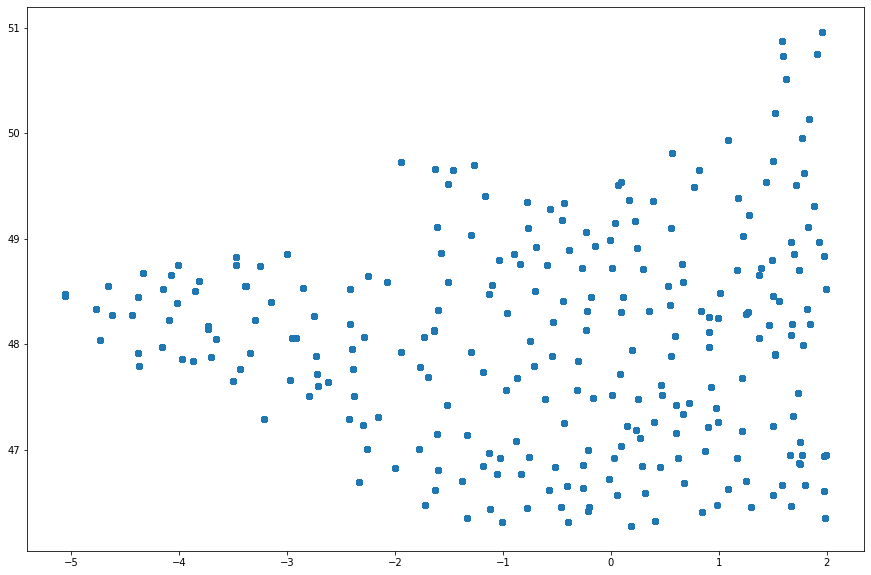

In [56]:
x = train_agg.lon
y = train_agg.lat
h = train_agg.height_sta
plt.plot(x, y, 'o')

In [60]:
for i, sta in enumerate(train_agg.number_sta):
    coo = (train_agg.lon[i], train_agg.lat[i])
    for j, voi in en

183747